In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('E:/OneDrive/Desktop/final/dataset/mrijpg/archive/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:/OneDrive/Desktop/final/dataset/mrijpg/archive/dataset\Testing\glioma_tumor\image(1).jpg
E:/OneDrive/Desktop/final/dataset/mrijpg/archive/dataset\Testing\glioma_tumor\image(10).jpg
E:/OneDrive/Desktop/final/dataset/mrijpg/archive/dataset\Testing\glioma_tumor\image(100).jpg
E:/OneDrive/Desktop/final/dataset/mrijpg/archive/dataset\Testing\glioma_tumor\image(11).jpg
E:/OneDrive/Desktop/final/dataset/mrijpg/archive/dataset\Testing\glioma_tumor\image(12).jpg
E:/OneDrive/Desktop/final/dataset/mrijpg/archive/dataset\Testing\glioma_tumor\image(13).jpg
E:/OneDrive/Desktop/final/dataset/mrijpg/archive/dataset\Testing\glioma_tumor\image(14).jpg
E:/OneDrive/Desktop/final/dataset/mrijpg/archive/dataset\Testing\glioma_tumor\image(15).jpg
E:/OneDrive/Desktop/final/dataset/mrijpg/archive/dataset\Testing\glioma_tumor\image(16).jpg
E:/OneDrive/Desktop/final/dataset/mrijpg/archive/dataset\Testing\glioma_tumor\image(17).jpg
E:/OneDrive/Desktop/final/dataset/mrijpg/archive/dataset\Testing\glioma_tumor\im

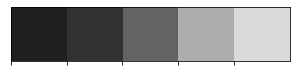

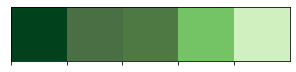

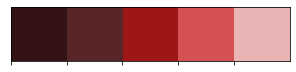

In [2]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [3]:
labels = ['glioma_tumor','meningioma_tumor','pituitary_tumor']

In [4]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('E:/OneDrive/Desktop/final/dataset/mrijpg/archive/dataset','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('E:/OneDrive/Desktop/final/dataset/mrijpg/archive/dataset','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:01<00:00, 59.25it/s]


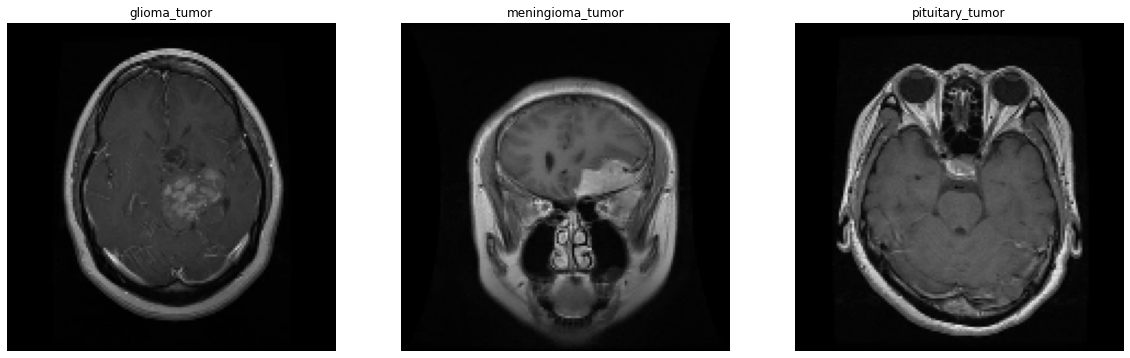

In [5]:
k=0
fig, ax = plt.subplots(1,3,figsize=(20,20))
fig.text(s="",size=18,fontweight='bold',fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [6]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)
X_train.shape

(2764, 150, 150, 3)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

In [10]:
effnet.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 150, 150, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 151, 151, 3)  0           ['normalization[0][0

In [11]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(3,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 150, 150, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 151, 151, 3)  0           ['normalization[0][0]']      

In [13]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [14]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [15]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

C:\Users\Ramprakash\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/12
70/70 [==============================] - ETA: 0s - loss: 0.4023 - accuracy: 0.8463
Epoch 00001: val_accuracy improved from -inf to 0.77108, saving model to effnet.h5
70/70 [==============================] - 73s 419ms/step - loss: 0.4023 - accuracy: 0.8463 - val_loss: 0.9081 - val_accuracy: 0.7711 - lr: 0.0010
Epoch 2/12
70/70 [==============================] - ETA: 0s - loss: 0.1889 - accuracy: 0.9334
Epoch 00002: val_accuracy did not improve from 0.77108
70/70 [==============================] - 23s 336ms/step - loss: 0.1889 - accuracy: 0.9334 - val_loss: 1.0120 - val_accuracy: 0.7590 - lr: 0.0010
Epoch 3/12
70/70 [==============================] - ETA: 0s - loss: 0.0944 - accuracy: 0.9674
Epoch 00003: val_accuracy improved from 0.77108 to 0.94378, saving model to effnet.h5
70/70 [==============================] - 26s 370ms/step - loss: 0.0944 - accuracy: 0.9674 - val_loss: 0.1586 - val_accuracy: 0.9438 - lr: 0.0010
Epoch 4/12
70/70 [==============================] - ETA: 0s

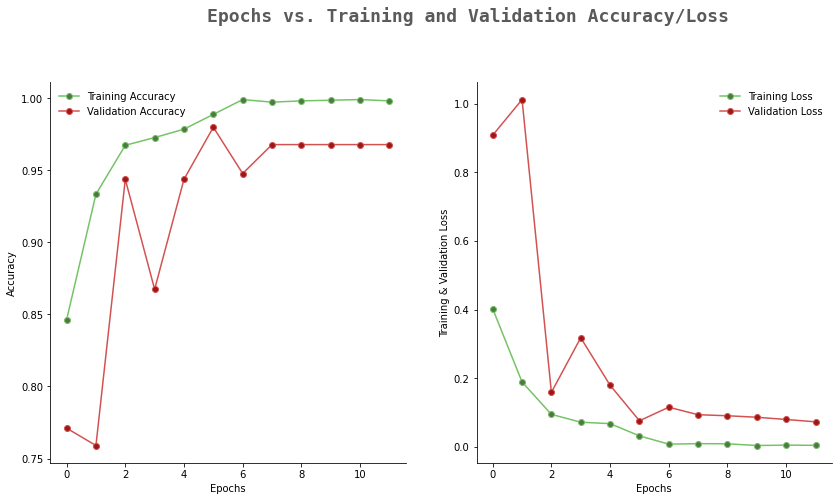

In [16]:
filterwarnings('ignore')

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [17]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [18]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        96
           1       0.96      0.97      0.96        91
           2       0.98      0.99      0.98        90

    accuracy                           0.97       277
   macro avg       0.97      0.97      0.97       277
weighted avg       0.97      0.97      0.97       277



In [19]:
''' def detection(upload):
    
    img = cv2.imread(upload)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(gray,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it has tumor') '''

" def detection(upload):\n    \n    img = cv2.imread(upload)\n    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n    img = cv2.resize(gray,(150,150))\n    img = img.reshape(1,150,150,3)\n    p = model.predict(img)\n    p = np.argmax(p,axis=1)[0]\n\n    if p==0:\n        p='Glioma Tumor'\n    elif p==1:\n        print('The model predicts that there is no tumor')\n    elif p==2:\n        p='Meningioma Tumor'\n    else:\n        p='Pituitary Tumor'\n\n    if p!=1:\n        print(f'The Model predicts that it has tumor') "

In [20]:
def classification(upload):
    img = cv2.imread(upload)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(gray,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        print(f'The Model predicts that it is a Glioma tumor')
    elif p==1:
        print('The model predicts that there is Meningioma tumor')
    elif p==2:
        print(f'The Model predicts that it is a Pituitary tumor')
    else:
        print(f'model cant predict')

    

The model predicts that there is Meningioma tumor


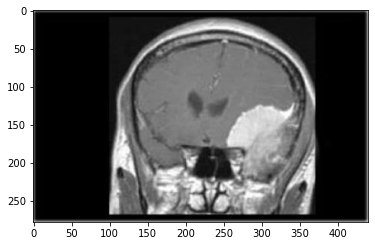

In [21]:
adahdagd = "E:/OneDrive/Desktop/final/dataset/mrijpg/archive/dataset/Testing/meningioma_tumor/image(1).jpg"
classification(adahdagd)
god =cv2.imread(adahdagd)
plt.imshow(god)


The Model predicts that it is a Pituitary tumor


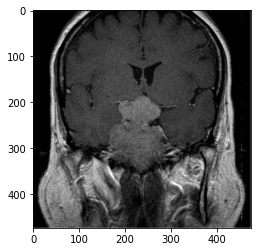

In [22]:
gravity = "E:/OneDrive/Desktop/final/dataset/mrijpg/archive/dataset/Testing/pituitary_tumor/image(5).jpg"
classification(gravity)
god1 =cv2.imread(gravity)
plt.imshow(god1)

The Model predicts that it is a Glioma tumor


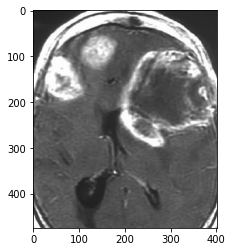

In [23]:
gravity1 = "E:/OneDrive/Desktop/final/dataset/mrijpg/archive/dataset/Testing/glioma_tumor/image(5).jpg"
classification(gravity1)
god1 =cv2.imread(gravity1)
plt.imshow(god1)

In [40]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
